# Swiss Health Insurance: Picking the Perfect Deductible

Switzerland’s health insurance system offers six deductible options (*franchises*), ranging from CHF 300 to CHF 2,500. But which one saves you the most money? Let’s cut through the noise and find out.

## The Big Reveal
**TL;DR**: Your average yearly health expenses over the past three years determine your best choice. If they’re *below ~CHF 2,000*, go for the **CHF 2,500 deductible** to slash your premiums. If they’re *above ~CHF 2,000*, pick the **CHF 300 deductible** to minimize total costs. The other four options? They’re just distractions that could cost you more.

## How We Know This
We’ve crunched the numbers using Python, NumPy, and Matplotlib to prove that only the extreme deductibles—CHF 300 and CHF 2,500—optimize your expenses (premiums + deductible + 10% co-insurance, capped at CHF 700 annually). The chart below visualizes this, showing how your total costs depend on your health spending.

## Find Your Sweet Spot
To choose wisely, calculate your **average yearly health expenses**:
1. Gather your medical bills (doctor visits, hospital stays, prescriptions—not insurance premiums) from the last three years.
2. Sum them up and divide by 3 to get your annual average.

Now, compare this number to our findings:
- **Below ~CHF 2,000?** Choose the **CHF 2,500 deductible**. It comes with the lowest premiums, saving you money if your medical costs stay moderate. You’ll pay up to CHF 2,500 out-of-pocket, plus up to CHF 700 in co-insurance.
- **Above ~CHF 2,000?** Opt for the **CHF 300 deductible**. Yes, premiums are higher, but you’ll only pay CHF 300 out-of-pocket before insurance kicks in, plus the CHF 700 co-insurance cap, keeping your total costs down when medical expenses soar.

## Why Only These Two?
The math is clear: intermediate deductibles (CHF 500, 1,000, 1,500, or 2,000) result in higher total costs because their premium savings don’t offset the out-of-pocket expenses as effectively as the extremes. Check out the calculations and chart below to see how we arrived at this insight.

Ready to save? Know your health costs, pick CHF 300 or CHF 2,500, and keep more money in your pocket!

---

## Run the numbers yourself!

At first, install the necessary dependencies to run the calculations.

In [ ]:
# Install and import dependencies

%pip install numpy matplotlib

import numpy as np
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.


## Your custom data

Adapt the cell below with your data coming from the [Premium Calculator](https://www.priminfo.admin.ch/de/praemien) of the Swiss Confederation (available in German, French and Italian.)

Choose your birth year, your ZIP code/city, whether you need to be insured against incidents, and your desired medical model(s) (home doctor, Telmed, HMO...).

Adapt the `MONTHLY_PREMIUM` list with the premiums in order: the first premium is relative to the 300 CHF franchise, the last to the 2500 CHF franchise.

In [ ]:
# Define monthly premiums (in CHF) for each deductible, based on your ZIP code,
# age, and insurance model
# Example: Data for a person born in 1984, living in Zurich, all models considered.
MONTHLY_PREMIUM = [458.25, 447.45, 420.25, 393.15, 366.05, 338.95]

## Run the programme

Now you are ready to run the calculations. You set your custom data in the previous step.
You are now ready to run the programme. It outputs information about choosing the right deductible for you and a chart showing where you'd better choose the 300 or the 2500 CHF deductible.

Break-even point: ~1891 CHF yearly health costs
If you have less then ~1891 CHF of yearly health costs, choose the 2500 CHF deductible.
Otherwise, if you have more than ~1891 CHF of yearly health costs, choose the 300 CHF deductible.


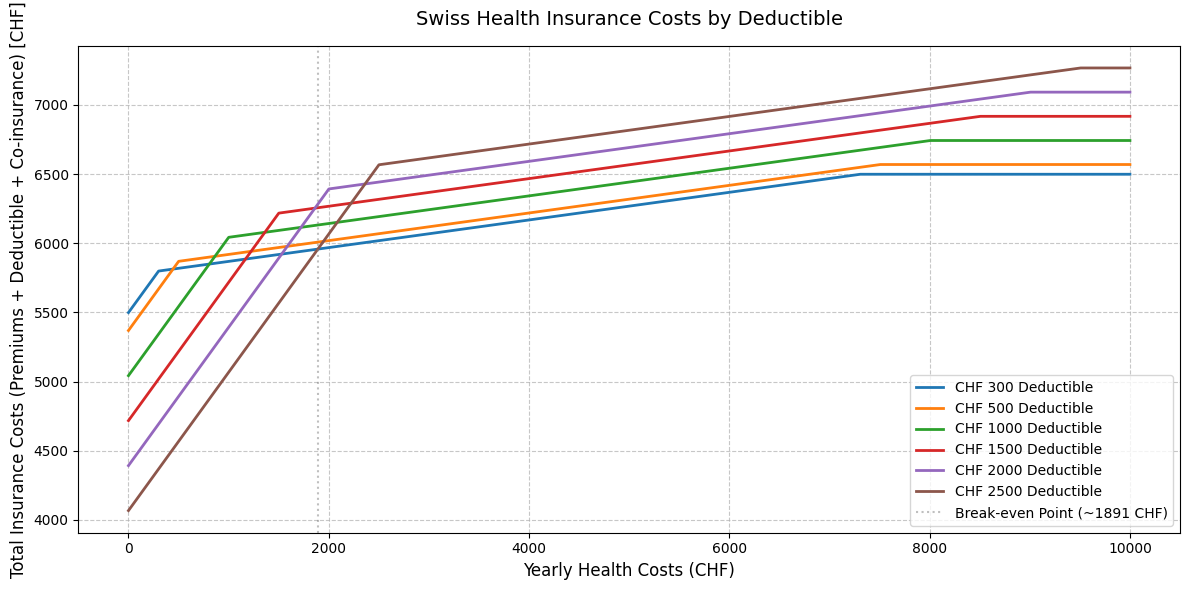

In [ ]:
# Define the six deductible options (in CHF) and co-insurance cap, which are fixed in Switzerland
DEDUCTIBLE = [300, 500, 1000, 1500, 2000, 2500]  # Franchise: amount paid out-of-pocket before insurance
CO_INSURANCE = 700  # Max 10% co-payment on medical bills after deductible, capped at CHF 700/year for adults

# Calculate yearly premiums from monthly premiums
yearly_premium = np.array(MONTHLY_PREMIUM) * 12

# Generate array of possible yearly health costs (CHF 0 to 10,000, step size 1)
yearly_costs = np.arange(0, 10001, 1)

# Calculate out-of-pocket costs (deductible + co-insurance) for each deductible and health cost
# If health cost <= deductible, pay full cost; else pay deductible + 10% of remaining cost, up to co-insurance cap
out_of_pocket_costs = np.array([
    np.minimum(yearly_costs, ded) + np.where(
        yearly_costs > ded,
        np.minimum(0.1 * (yearly_costs - ded), CO_INSURANCE),
        0
    ) for ded in DEDUCTIBLE
]).T  # Transpose for shape (health_costs, deductibles)

# Calculate total costs (yearly premium + out-of-pocket costs) for each deductible
total_costs = yearly_premium + out_of_pocket_costs

# Find the break-even point between CHF 300 and CHF 2,500 deductibles
# Use linear interpolation between points where costs are closest
cost_300 = total_costs[:, 0]  # Costs for CHF 300 deductible (index 0)
cost_2500 = total_costs[:, -1]  # Costs for CHF 2,500 deductible (index -1)
diff = cost_300 - cost_2500  # Difference between the two cost curves
break_even_idx = np.where(np.diff(np.sign(diff)))[0][0]  # Index where curves cross
break_even_cost = yearly_costs[break_even_idx]  # Approximate break-even health cost
# Refine with linear interpolation for precision
if break_even_idx > 0:
    prev_diff = diff[break_even_idx - 1]
    curr_diff = diff[break_even_idx]
    fraction = prev_diff / (prev_diff - curr_diff)
    break_even_cost = yearly_costs[break_even_idx - 1] + fraction * (yearly_costs[break_even_idx] - yearly_costs[break_even_idx - 1])
break_even_value = cost_300[break_even_idx]  # Total cost at break-even point
print(f"Break-even point: ~{break_even_cost:.0f} CHF yearly health costs")
print(f"If you have less then ~{break_even_cost:.0f} CHF of yearly health costs, choose the 2500 CHF deductible.")
print(f"Otherwise, if you have more than ~{break_even_cost:.0f} CHF of yearly health costs, choose the 300 CHF deductible.")

# Create the plot
plt.figure(figsize=(12, 6))  # Set figure size for better readability
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']  # Distinct colors for lines
for i, ded in enumerate(DEDUCTIBLE):
    plt.plot(yearly_costs, total_costs[:, i], label=f'CHF {ded} Deductible', color=colors[i], linewidth=2)

# Customize plot for clarity and appeal
plt.xlabel('Yearly Health Costs (CHF)', fontsize=12)
plt.ylabel('Total Insurance Costs (Premiums + Deductible + Co-insurance) [CHF]', fontsize=12)
plt.title('Swiss Health Insurance Costs by Deductible', fontsize=14, pad=15)
plt.legend(title='Deductible Options', loc='upper left', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)  # Add grid for easier reading
plt.axvline(break_even_cost, color='gray', linestyle=':', label=f'Break-even Point (~{break_even_cost:.0f} CHF)', alpha=0.5)  # Dynamic crossover line
plt.legend(fontsize=10)
plt.tight_layout()

# Display the plot
plt.show()